In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
playstore=pd.read_csv('googleplaystore.csv')

In [3]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
playstore[playstore['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
playstore.drop(labels=10472,inplace=True)

In [6]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
playstore['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [8]:
playstore['Price']=playstore['Price'].str.replace('$','').astype(float)

C:\Users\Krishna\AppData\Local\Temp\ipykernel_7768\2415314466.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore['Price']=playstore['Price'].str.replace('$','').astype(float)


In [9]:
paid_apps=playstore[playstore['Price']!=0].copy()

In [10]:
paid_apps.drop(labels='Type',axis='columns',inplace=True)

In [11]:
paid_apps['Reviews']=paid_apps['Reviews'].astype(float)

In [12]:
def clean_size(size):
    if size.endswith('M'):
        size=float(size.replace('M',''))
    elif size.endswith('k'):
        size=float(size.replace('k',''))/1000
    else:
        size=pd.np.NaN
    return size
paid_apps['Size']=paid_apps["Size"].apply(clean_size)

C:\Users\Krishna\AppData\Local\Temp\ipykernel_7768\4210036895.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  size=pd.np.NaN


In [13]:
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,"100,000+",3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [14]:
paid_apps=paid_apps.reset_index(drop=True)

In [15]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    float64
 4   Size            724 non-null    float64
 5   Installs        800 non-null    object 
 6   Price           800 non-null    float64
 7   Content Rating  800 non-null    object 
 8   Genres          800 non-null    object 
 9   Last Updated    800 non-null    object 
 10  Current Ver     798 non-null    object 
 11  Android Ver     799 non-null    object 
dtypes: float64(4), object(8)
memory usage: 75.1+ KB


In [16]:
paid_apps['App'].value_counts().shape[0]

756

In [17]:
app_mask = paid_apps["App"].isin(
    ["Fuzzy Numbers: Pre-K Number Foundation", "Toca Life: City"]
)

category_mask = paid_apps["Category"] == "FAMILY"

paid_apps[app_mask & category_mask]
paid_apps.drop([38, 210], inplace=True)
print(paid_apps.duplicated(subset="App").sum())

42


In [18]:
paid_apps.sort_values("Reviews", ascending=False, inplace=True)
paid_apps.drop_duplicates("App", inplace=True)
print(paid_apps.duplicated("App").sum())
paid_apps.reset_index(inplace=True, drop=True)

0


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

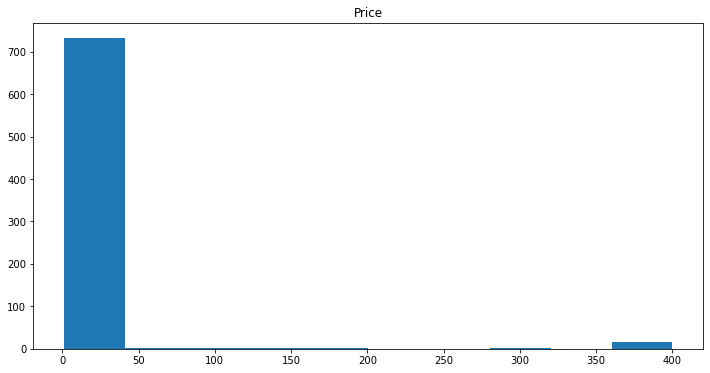

In [19]:
paid_apps.hist(column="Price", grid=False, figsize=(12,6))

In [20]:
paid_apps.sort_values(by="Price", ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
278,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
207,I am Rich Plus,FAMILY,4.0,856.0,8.7,"10,000+",399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
125,I am rich,LIFESTYLE,3.8,3547.0,1.8,"100,000+",399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
683,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0.0,40.0,0+,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
305,I Am Rich Pro,FAMILY,4.4,201.0,2.7,"5,000+",399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

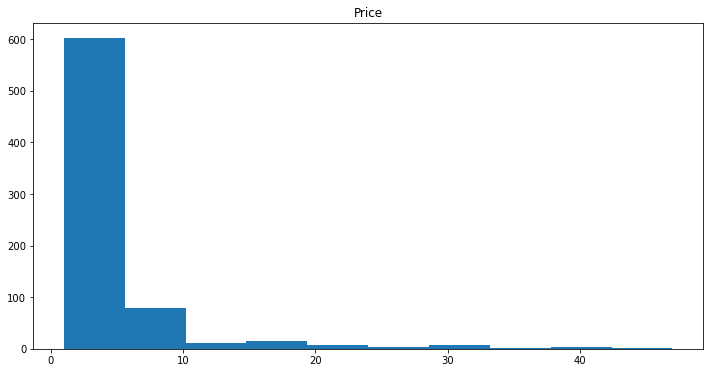

In [21]:
affordable_apps = paid_apps[paid_apps["Price"]<50].copy()
affordable_apps.hist(column="Price", grid=False, figsize=(12,6))

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

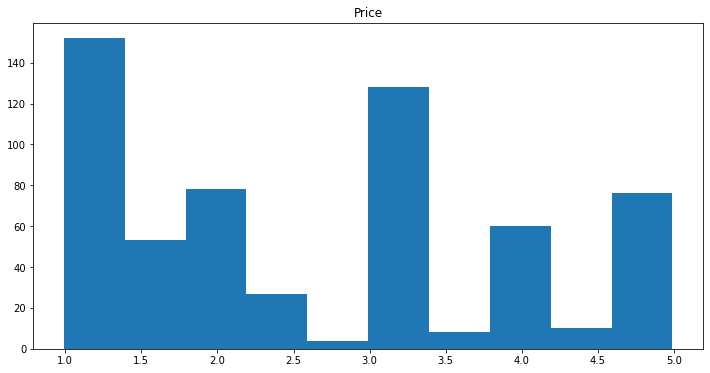

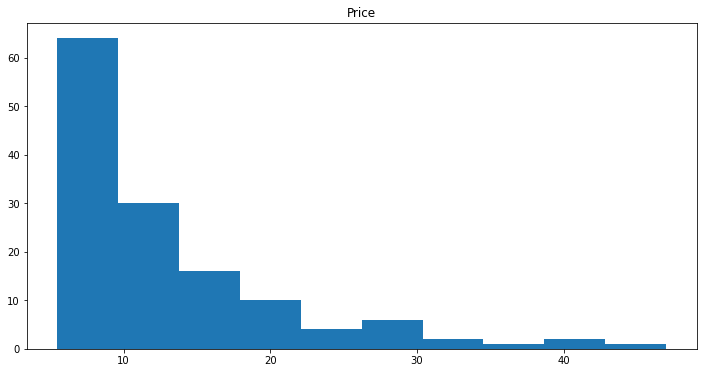

In [22]:
cheap=affordable_apps['Price']<5
reasonable=affordable_apps['Price']>5
affordable_apps[cheap].hist(column="Price", grid=False, figsize=(12,6))
affordable_apps[reasonable].hist(column="Price", grid=False, figsize=(12,6))

In [23]:
affordable_apps["affordability"] = affordable_apps.apply(
    lambda row: "cheap" if row["Price"] < 5 else "reasonable",
    axis=1
)

<AxesSubplot:xlabel='Price', ylabel='Rating'>

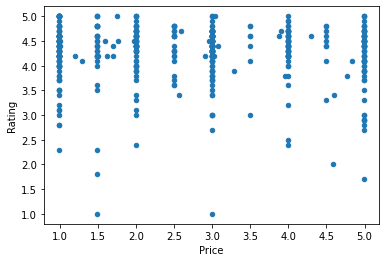

In [24]:
affordable_apps[cheap].plot(kind="scatter", x="Price", y="Rating")

In [25]:
print(affordable_apps[cheap].corr().loc["Rating", "Price"])

-0.055937715054631555


In [26]:
cheap_mean = affordable_apps.loc[cheap, "Price"].mean()
affordable_apps.loc[cheap,'price_criterion']=affordable_apps['Price'].apply(lambda price:1 if price<cheap_mean else 0)
affordable_apps['price_criterion'].head()

0    NaN
1    1.0
2    NaN
3    0.0
4    1.0
Name: price_criterion, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Rating'>

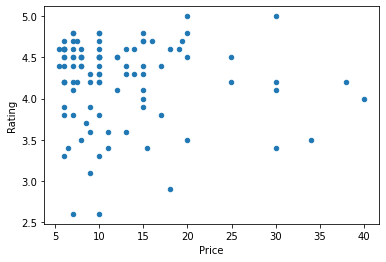

In [27]:
affordable_apps[reasonable].plot(kind="scatter", x="Price", y="Rating")

In [28]:
print(affordable_apps[reasonable].corr().loc["Rating", "Price"])

-0.04860964708513041


In [31]:
reasonable_mean = affordable_apps.loc[reasonable, "Price"].mean()

affordable_apps.loc[reasonable,"price_criterion"] = affordable_apps["Price"].apply(
    lambda price: 1 if price < reasonable_mean else 0
)

In [32]:
affordable_apps['price_criterion'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: price_criterion, dtype: float64

In [34]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1

genres_mean = affordable_apps.groupby(
    ["affordability", "genre_count"]
).mean()[["Price"]]


def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

affordable_apps["genre_criterion"] = affordable_apps.apply(
    label_genres, axis="columns"
)

In [42]:
affordable_apps['Category'].unique()

array(['FAMILY', 'GAME', 'SPORTS', 'PERSONALIZATION', 'PRODUCTIVITY',
       'WEATHER', 'TOOLS', 'COMMUNICATION', 'PHOTOGRAPHY', 'EDUCATION',
       'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS', 'TRAVEL_AND_LOCAL',
       'BUSINESS', 'PARENTING', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'VIDEO_PLAYERS', 'MEDICAL', 'AUTO_AND_VEHICLES', 'FOOD_AND_DRINK',
       'DATING', 'BOOKS_AND_REFERENCE', 'ART_AND_DESIGN', 'SHOPPING',
       'SOCIAL', 'NEWS_AND_MAGAZINES', 'LIBRARIES_AND_DEMO'], dtype=object)

In [50]:
category_mean=affordable_apps.groupby(['affordability','Category']).mean()[['Price']]
category_mean

Price
affordability Category                      
cheap         ART_AND_DESIGN        1.990000
              AUTO_AND_VEHICLES     1.740000
              BOOKS_AND_REFERENCE   2.529286
              BUSINESS              3.632857
              COMMUNICATION         2.428846
              DATING                3.115000
              EDUCATION             3.990000
              ENTERTAINMENT         3.990000
              FAMILY                2.754740
              FINANCE               3.490000
              FOOD_AND_DRINK        4.240000
              GAME                  2.547222
              HEALTH_AND_FITNESS    3.035455
              LIBRARIES_AND_DEMO    0.990000
              LIFESTYLE             2.895000
              MAPS_AND_NAVIGATION   1.656667
              MEDICAL               2.764286
              NEWS_AND_MAGAZINES    1.990000
              PARENTING             4.790000
              PERSONALIZATION       1.689873
              PHOTOGRAPHY           3.023571
              PRODUCTIVITY          2.635909
              SHOPPING              2.740000
              SOCIAL                0.990000
              SPORTS                2.773636
              TOOLS                 2.596056
              TRAVEL_AND_LOCAL      2.942222
              VIDEO_PLAYERS         1.490000
              WEATHER               3.240000
reasonable    AUTO_AND_VEHICLES     9.990000
              BOOKS_AND_REFERENCE   6.025714
              BUSINESS             14.967500
              COMMUNICATION        19.990000
              DATING                7.490000
              EDUCATION             5.990000
              FAMILY               15.426800
              FINANCE              21.240000
              GAME                 10.091000
              HEALTH_AND_FITNESS    7.740000
              LIFESTYLE            17.323333
              MAPS_AND_NAVIGATION  10.990000
              MEDICAL              13.805789
              PERSONALIZATION       8.490000
              PHOTOGRAPHY          15.190000
              PRODUCTIVITY          7.590000
              SOCIAL               13.990000
              SPORTS               19.490000
              TOOLS                11.847143
              TRAVEL_AND_LOCAL      7.823333
              VIDEO_PLAYERS         5.990000
              WEATHER               6.490000

In [52]:
def label_category(row):
    """For each segment in `categories_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""
    aff=row['affordability']
    cat=row['Category']
    price=row['Price']
    if price<category_mean.loc[(aff,cat)][0]:
        return 1
    else:
        return 0

affordable_apps["category_criterion"] = affordable_apps.apply(
    label_category, axis="columns"
)

In [53]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')

affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
1,Hitman Sniper,GAME,4.6,408292.0,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1,1.0
504,An Elite Warrior Ex,GAME,4.7,15.0,93.0,100+,0.99,Everyone,Adventure,"November 21, 2016",1.59,4.0.3 and up,cheap,1.0,1,1,1,1.0
73,Football Manager Mobile 2018,SPORTS,3.9,11460.0,NaN,"100,000+",8.99,Everyone,Sports,"June 27, 2018",Varies with device,4.1 and up,reasonable,1.0,1,1,1,1.0
192,Volume Slider Like Android P Volume Control,TOOLS,4.1,1129.0,1.7,"10,000+",0.99,Everyone,Tools,"June 30, 2018",1.28,4.1 and up,cheap,1.0,1,1,1,1.0
59,Camera FV-5,PHOTOGRAPHY,3.8,16320.0,NaN,"100,000+",3.95,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device,cheap,0.0,1,0,0,0.0


In [54]:
nr_eligible = affordable_apps["Result"].sum()
print(nr_eligible, nr_eligible/affordable_apps.shape[0], sep="\n")

401.0
0.5470668485675307


In [55]:
def new_price(row):
    if row['affordability']=='cheap':
        return round(max(cheap_mean,row['Price']),2)
    else:
        return round(max(reasonable_mean,row['Price']),2)
    
affordable_apps['New Price']=affordable_apps.apply(new_price,axis='columns')

In [57]:
affordable_apps['Installs']=affordable_apps['Installs'].str.replace('[+,]','').astype(int)

C:\Users\Krishna\AppData\Local\Temp\ipykernel_7768\4165869481.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  affordable_apps['Installs']=affordable_apps['Installs'].str.replace('[+,]','').astype(int)


In [58]:
affordable_apps['Impact']=(affordable_apps['New Price']-affordable_apps['Price'])*affordable_apps['Installs']
total_impact=affordable_apps['Impact'].sum()
total_impact

116192245.83